# COGS 108 - EDA Checkpoint

# Names

- Alessandro Todaro
- Richard Yu
- Vivek Rayalu
- Mengyu Zhang
- Hedy Wang

<a id='research_question'></a>
# Research Question

How does college GPA correlate to salary and job satisfaction, and how does the correlation differ between fields/degrees?

# Setup

In [84]:
import pandas as pd

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 7)

import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('data.csv')

# Data Cleaning

Columns are renamed for easier manipulation. Rows with values that represent missing or non-applicable data are removed. Empty data is NOT removed because the survey's questions changed when taken in different years, so some years do not have certain variables, but those years could still be used for analysis. Finally, the numeric codes used by IPUMS are replaced with the descriptors they represent, for ease of use.

In [48]:
# give columns friendlier names
df = df.rename(columns={'PERSONID':'id', 'YEAR':'year', 'SURID':'survey', 'NBAMEMG':'major', 'UGGPA':'gpa', 
                   'EXPFT':'yearsexperience', 'OCEDRLP':'jobrelated', 'SALARY':'salary', 'JOBSATIS':'jobsatisfaction'})

# salary values of 9999998 or 9999999 represent missing or error data
# GPA value of 8 represents respondant did not recall GPA or did not have one
# job related value of 98 represents missing or error data
# major value of 96 represents blank response
# job satisfaction value of 98 represents missing or error data
df = df[df['salary'] < 9999998]
df = df[df['gpa'] != 8]
df = df[df['jobrelated'] != 98]
df = df[df['major'] != 96]
df = df[df['jobsatisfaction'] != 98]


# replace numeric values with the category/descriptor they represent
df['survey'].replace([1,3],['NSCG','NSRCG'],inplace=True)
df['major'].replace([1,2,3,4,5,6,7,9],['Computer and mathematical sciences',
                                       'Life and related sciences',
                                       'Physical and related sciences',
                                       'Social and related sciences',
                                       'Engineering',
                                       'Science and engineering-related fields',
                                       'Non-science and engineering fields',
                                       'Others'],inplace=True)
df['gpa'].replace([1,2,3,4,5],['4.00 - 3.75',
                               '3.74 - 3.25',
                               '3.24 - 2.75',
                               '2.74 - 2.25',
                               '< 2.25'],inplace=True)
df['jobrelated'].replace([1,2,3],['Closely related',
                                  'Somewhat related', 
                                  'Not related',],inplace=True)
df['jobsatisfaction'].replace([1,2,3,4],['Very satisfied',
                                          'Somewhat satisfied',
                                          'Somewhat dissatisfied',
                                          'Very dissatisfied'],inplace=True)

# NSCG does not contain the data we need
df = df[df['survey'] == 'NSRCG']

# Data Analysis & Results (EDA)

The data we are using comes from the National Survey of Recent College Graduates, which was conducted by the National Science Foundation. In particular, we are using the survey data from 1993, 1995, 1997, and 1999, since those years' surveys included a question about undergraduate GPA, which we need for our analysis. As seen by the shape of the dataframe, there are around 45 thousand observations from these four years - each observation being one individual's responses to the survey in a given year.

Due to the nature of the survey, many of the variables are discrete: GPA, job satisfaction, and the relation between college major and field of work were given as multiple choice questions, so there are just a handful of groupings for these variables. Years of work experience and annual salary are continuous variables, however, measured in years and dollars respectively. 

Additionally, the questions that were asked differed slightly in different years. For instance, job satisfaction was only surveyed once out of the four years - in 1997 only - so that variable has far fewer observations. Thus, it would be wrong to ignore rows missing this variable, since it does not indicate faulty data, and most of our analysis does not involve job satisfaction; at the same time, some analysis can be done on job satisfaction despite its smaller sample size, so it is left in the data. Similarly, data on job experience only exists for the 1993 and 1995 surveys.

The National Science Foundation is a trustworthy and renowned institution, so there is little reason to doubt the integrity of this survey's data or how it was collected. However, being a survey, all the data from the individuals taking the survey is self-reported, which could result in various inaccuracies.

In [28]:
df.shape

(45002, 9)

In [36]:
df.head()

,id,year,survey,major,gpa,yearsexperience,jobrelated,salary,jobsatisfaction
67855,30000000000000001,1993,NSRCG,Engineering,3.24 - 2.75,3.0,Somewhat related,40000,NaN
67856,30000000000000002,1993,NSRCG,Engineering,4.00 - 3.75,2.0,Closely related,26000,NaN
67857,30000000000000003,1993,NSRCG,Engineering,3.24 - 2.75,3.0,Somewhat related,45000,NaN
67859,30000000000000005,1993,NSRCG,Non-science and engineering fields,3.74 - 3.25,1.0,Not related,13000,NaN
67860,30000000000000006,1993,NSRCG,Social and related sciences,3.24 - 2.75,2.0,Not related,21000,NaN


In [43]:
df.isna().sum()

id                     0
year                   0
survey                 0
major                  0
gpa                    0
yearsexperience    17734
jobrelated             0
salary                 0
jobsatisfaction    35886
dtype: int64

Aside from variables that are expected to have missing values (due to not being asked about in every year), the dataset appears to have no missing data. The IPUMS database from which we obtained the data does some amount of cleaning, so this is not unexpected.

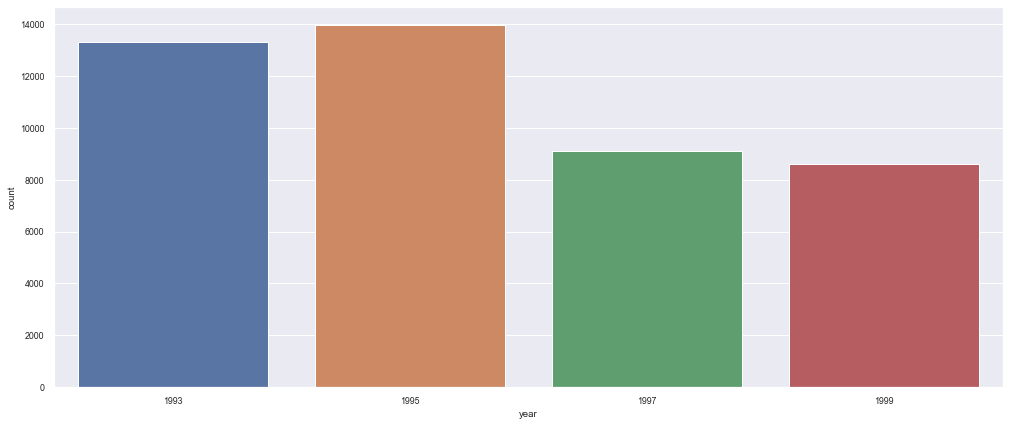

In [73]:
sns.countplot(x='year', data=df)
plt.show()

From this plot, we can see that each year received at least 8000 responses, with 1995 and 1993 receiving significantly more than 1997 and 1995, at roughly 13000 each.

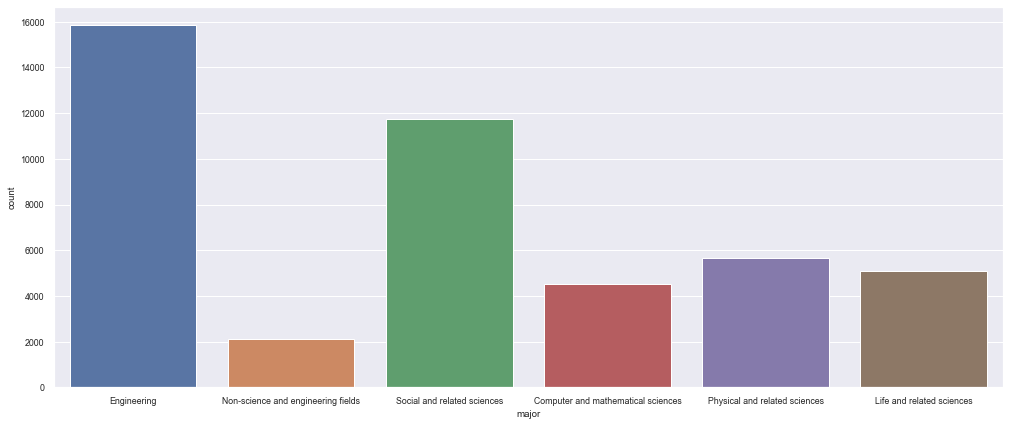

In [77]:
sns.countplot(x='major', data=df)
plt.show()

Engineering majors make up the largest group by major in the data, followed by social science majors. Majors in fields not related to science or engineering are the minority.

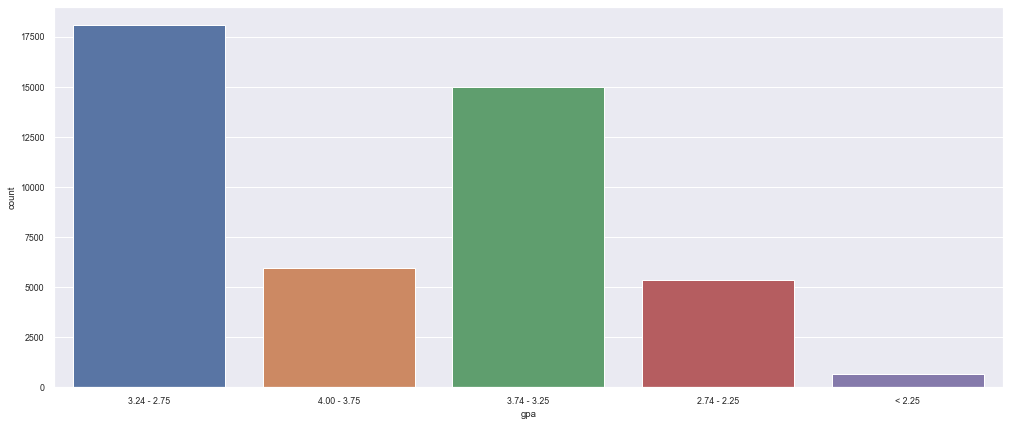

In [78]:
sns.countplot(x='gpa', data=df)
plt.show()

Most respondants in our dataset have a GPA somewhere around 3.5 to 3. We have very little data from people with (self-reported) GPAs under 2.25.

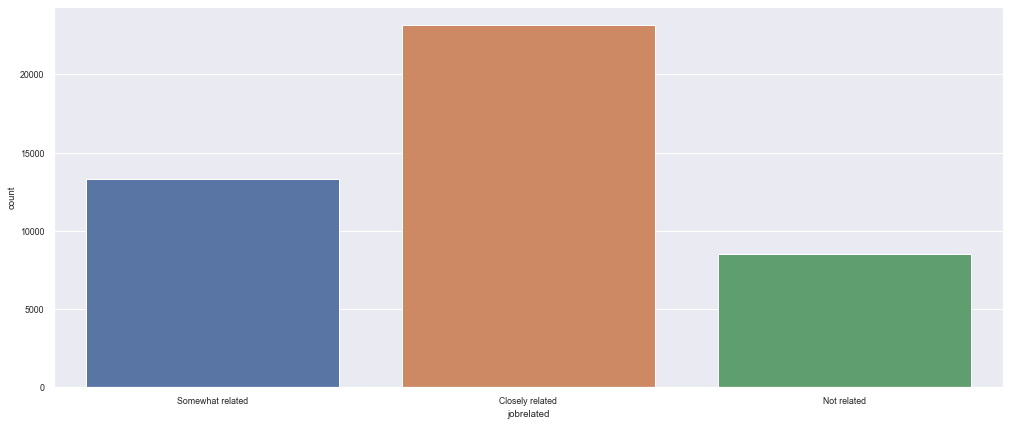

In [80]:
sns.countplot(x='jobrelated', data=df)
plt.show()

Most of the respondants have a job at least somewhat related to their major - but almost 10,000 of them work in a field not related to their major at all.

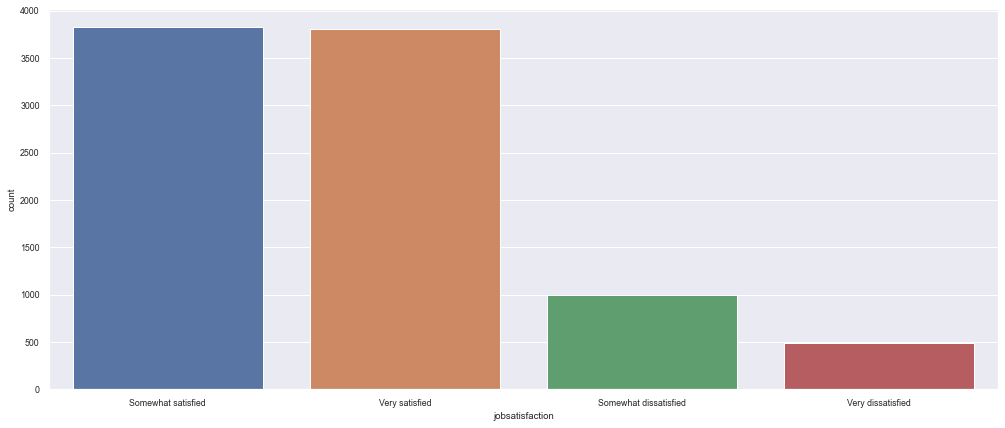

In [81]:
sns.countplot(x='jobsatisfaction', data=df)
plt.show()

The wide majority of respondants who were asked about job satisfaction feel at least partially satisfied by their current job, with less than 500 of them reporting they were 'very dissatisfied'. However, since this variable was only collected in 1997, the data is more limited.

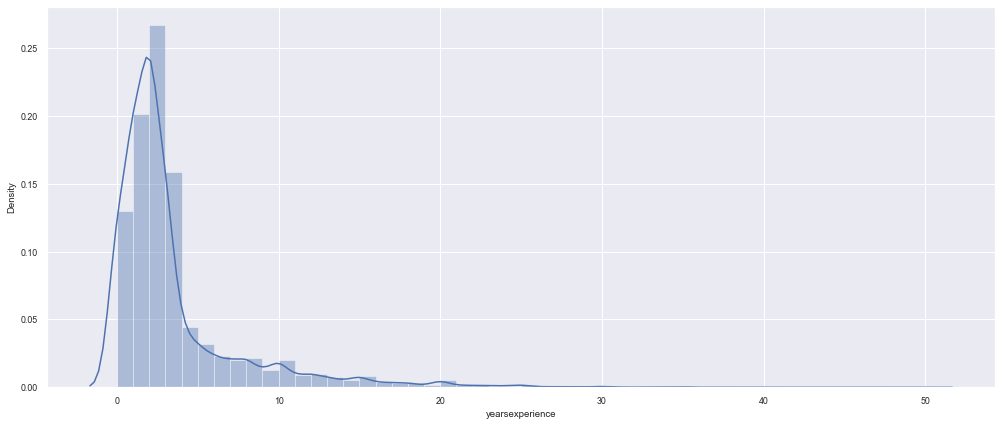

(93, 9)


In [87]:
sns.distplot(df['yearsexperience'])
plt.show()

print(df[df['yearsexperience'] > 25].shape)

Most respondants in the dataset don't have many years of job experience, which makes sense considering the survey is meant for recent graduates. There are a handful of people with several decades of experience, however - these might be working adults pursuing an education. Since there is no age data in our dataset, this cannot be confirmed.

In [44]:
df['salary'].describe()

count     45002.000000
mean      30435.269544
std       15279.033195
min           0.000000
25%       19000.000000
50%       30000.000000
75%       40000.000000
max      100000.000000
Name: salary, dtype: float64

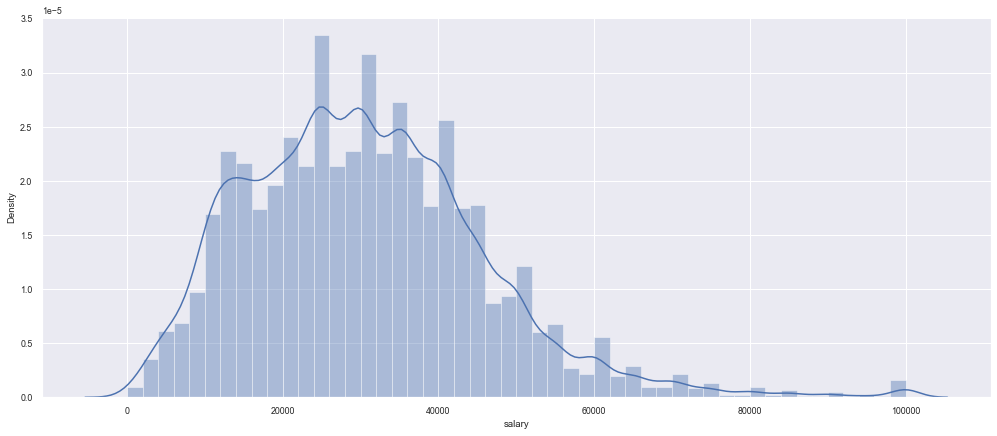

(632, 9)
(26, 9)


In [85]:
sns.distplot(df['salary'])
plt.show()

print(df[df['salary'] < 5000].shape)
print(df[df['salary'] == 0].shape)

Looking at the salary variable, the distribution does not appear out of the ordinary. The large spikes around certain values could be explained by respondants rounding or approximating their annual salary to a 'friendly' number, such as a multiple of 1,000 or 10,000. A small number of respondants put their salary as a value between 5000 and 0, which seems excessively small. This could be the result of misinterpreting the question to be about monthly salary instead of yearly. Removing these outliers might result in better analysis.

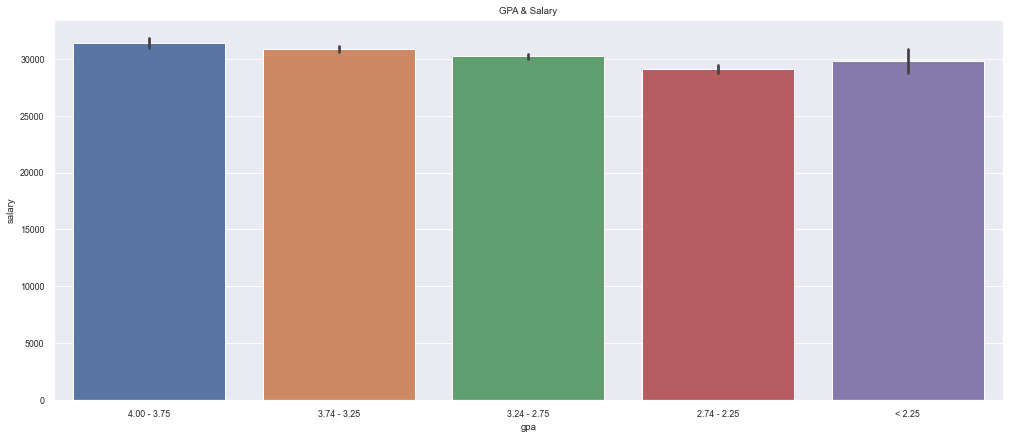

In [90]:
# define order
gpaorder = ['4.00 - 3.75','3.74 - 3.25','3.24 - 2.75','2.74 - 2.25','< 2.25']

sns.barplot(x='gpa', y='salary', data=df, order=gpaorder).set_title('GPA & Salary')
plt.show()

Looking at this basic relationship between GPA and salary across all majors, it seems higher GPAs correlate to slightly higher salaries, except in the case of GPAs less than 2.25 - however, this category also has the highest variance. This higher variance could be explained by the significantly smaller amount of data for GPAs of <2.25.

In [30]:
# group by major
engineering = df[df['major'] == 'Engineering']
lifesciences = df[df['major'] == 'Life and related sciences']
nonscience = df[df['major'] == 'Non-science and engineering fields']
compmathsciences = df[df['major'] == 'Computer and mathematical sciences']
socialsciences = df[df['major'] == 'Social and related sciences']
physicalsciences = df[df['major'] == 'Physical and related sciences']

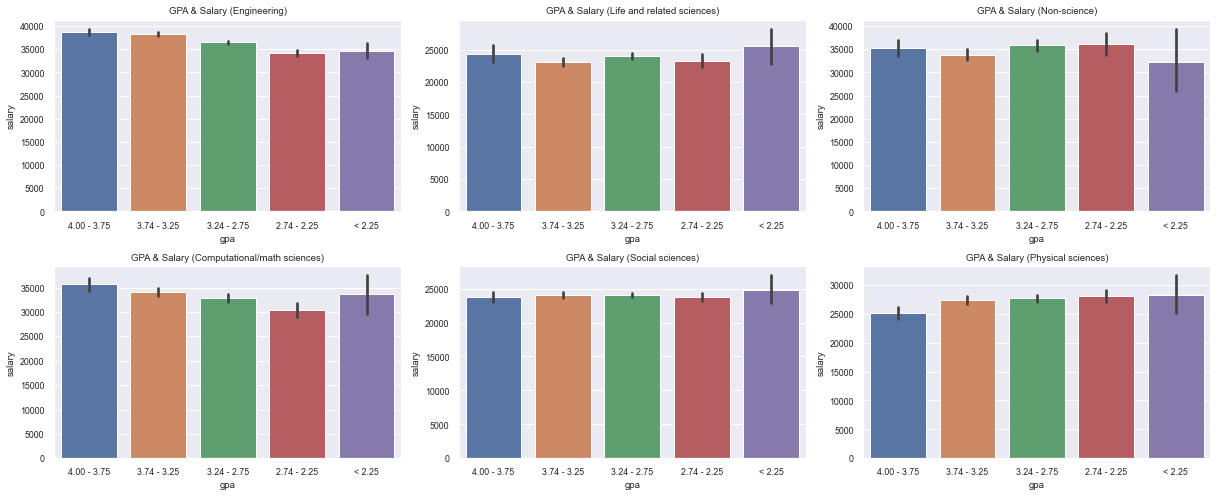

In [70]:
plt.subplot(2, 3, 1)
sns.barplot(x='gpa', y='salary', data=engineering, order=gpaorder).set_title('GPA & Salary (Engineering)')

plt.subplot(2, 3, 2)
sns.barplot(x='gpa', y='salary', data=lifesciences, order=gpaorder).set_title('GPA & Salary (Life and related sciences)')

plt.subplot(2, 3, 3)
sns.barplot(x='gpa', y='salary', data=nonscience, order=gpaorder).set_title('GPA & Salary (Non-science)')

plt.subplot(2, 3, 4)
sns.barplot(x='gpa', y='salary', data=compmathsciences, order=gpaorder).set_title('GPA & Salary (Computational/math sciences)')

plt.subplot(2, 3, 5)
sns.barplot(x='gpa', y='salary', data=socialsciences, order=gpaorder).set_title('GPA & Salary (Social sciences)')

plt.subplot(2, 3, 6)
sns.barplot(x='gpa', y='salary', data=physicalsciences, order=gpaorder).set_title('GPA & Salary (Physical sciences)')

plt.tight_layout()
plt.show()

Looking at the above relationships, it's clear that there are significant differences between majors - for engineering or computational and math majors, there are relatively large differences between the different GPA groups, compared to social sciences or life sciences, where every group is roughly the same. Strangely, for physical sciences, the lowest average salary occurs in the highest GPA group - this could be due to outliers, or it might be a real phenomenon with an explanation.

For every major, the <2.25 GPA category has the highest variance, often by a significant margin.

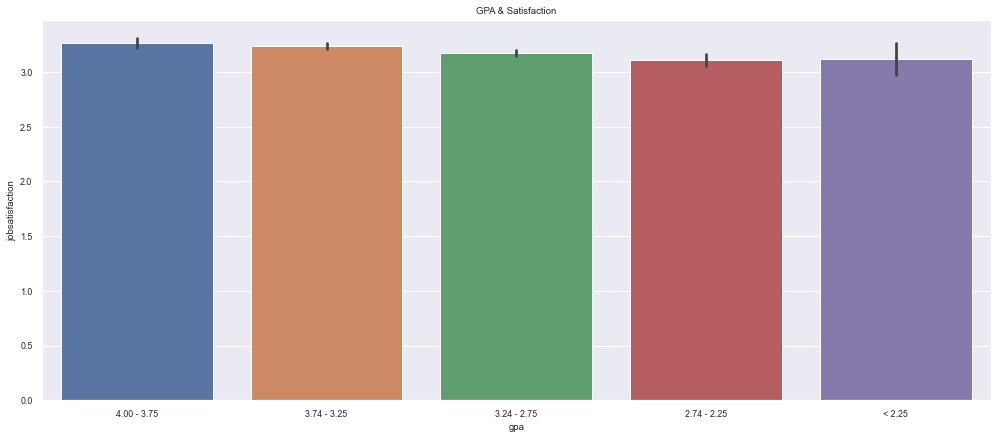

In [93]:
sns.barplot(x='gpa', y='jobsatisfaction', data=df.replace(['Very satisfied',
                                          'Somewhat satisfied',
                                          'Somewhat dissatisfied',
                                          'Very dissatisfied'],[4,3,2,1]), order=gpaorder).set_title('GPA & Satisfaction')
plt.show()

This bar plot is very similar to the one plotting GPA and salary. It could be that having a higher GPA gives someone more job opportunities and thus a higher chance of getting a job they enjoy, but it could also be that how a person describes their job satisfaction relies heavily on their salary.